## 06 Case study 3_ Predicting employee turnover

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import pingouin as pg
import matplotlib.pyplot as plt

## Example 1a: using frequency tables to explore regional differences in staff turnover

In [2]:
df = pd.read_excel("Chapter 6 Individual Turnover.xls")

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,BossGender,Gender,Age,LengthOfService,AppraisalRating,Country,LeaverStatus
0,0,0.0,48,0,2,1,1.0
1,0,0.0,26,6,4,1,1.0
2,1,0.0,45,26,4,1,0.0
3,1,0.0,52,13,4,1,0.0
4,1,0.0,31,1,4,1,0.0


In [4]:
print(df.shape)
#df.info()

(1653, 7)


## Example 1b: using chi-square analysis to explore regional differences in individual staff turnover

In [5]:
# This code works.
# But I made a way better code in case study 5, so check it out, although it still needs to be improved!
crosstab_CC = pd.crosstab(df['LeaverStatus'], df['Country'], margins=True)
crosstab_CC.columns = ['Num Emp in Belgium', 'Num Emp in Sweden',
                       'Num Emp in Italy', 'Num Emp in France',
                       'Num Emp in Poland', 'Num Emp in Mexico',
                       'Num Emp in Spain', 'Num Emp in UK',
                       'Num Emp in USA', 'Num Emp in Australia',
                       'Num Emp in Total']
crosstab_CC.index = ['Stayer', 'Leaver', 'Frequency']
crosstab_CC_Fig = crosstab_CC.transpose()

Per_Cent = ((crosstab_CC_Fig['Frequency']/crosstab_CC_Fig.loc['Num Emp in Total','Frequency'])*100)
Stayer_Per_Cent = ((crosstab_CC_Fig['Stayer']/crosstab_CC_Fig['Frequency'])*100)
Leaver_Per_Cent = ((crosstab_CC_Fig['Leaver']/crosstab_CC_Fig['Frequency'])*100)
crosstab_CC_Fig["Per Cent to Total"] = Per_Cent.round(1)
crosstab_CC_Fig["Stayer % w/in Country"] = Stayer_Per_Cent.round(1)
crosstab_CC_Fig["Leaver % w/in Country"] = Leaver_Per_Cent.round(1)
crosstab_CC_Fig["Cumulative Per Cent to Total"] = Per_Cent.cumsum().round(1)

print("Country Code")
crosstab_CC_Fig

Country Code


,Stayer,Leaver,Frequency,Per Cent to Total,Stayer % w/in Country,Leaver % w/in Country,Cumulative Per Cent to Total
Num Emp in Belgium,33,7,40,2.4,82.5,17.5,2.4
Num Emp in Sweden,28,8,36,2.2,77.8,22.2,4.6
Num Emp in Italy,55,15,70,4.2,78.6,21.4,8.8
Num Emp in France,31,6,37,2.2,83.8,16.2,11.1
Num Emp in Poland,35,5,40,2.4,87.5,12.5,13.5
Num Emp in Mexico,39,7,46,2.8,84.8,15.2,16.3
Num Emp in Spain,64,12,76,4.6,84.2,15.8,20.9
Num Emp in UK,168,28,196,11.9,85.7,14.3,32.7
Num Emp in USA,949,115,1064,64.4,89.2,10.8,97.2
Num Emp in Australia,39,8,47,2.8,83.0,17.0,100.0


The above table corresponds to the "Frequency Table for Country Code in Figure 6.3" and the "crosstabulation in Figure 6.8".

In [6]:
# https://www.geeksforgeeks.org/how-to-drop-one-or-multiple-columns-in-pandas-dataframe/

In [7]:
crosstab_SL = pd.crosstab(df['Country'], df['LeaverStatus'], margins=True)
crosstab_SL.columns = ['Stayer', 'Leaver', 'Total']
crosstab_SL.index = ['Belgium', 'Sweden', 'Italy', 'France', 'Poland',
                     'Mexico', 'Spain', 'UK', 'USA', 'Australia', 'Frequency']
crosstab_SL_Fig = crosstab_SL.transpose()
crosstab_SL_Fig.drop(crosstab_SL_Fig.loc[:, 'Belgium':'Australia'].columns, axis=1, inplace=True)

Per_Cent = ((crosstab_SL_Fig['Frequency']/crosstab_SL_Fig.loc['Total', 'Frequency'])*100)
crosstab_SL_Fig["Per Cent to Total"] = Per_Cent.round(1)
crosstab_SL_Fig["Cumulative Per Cent to Total"] = Per_Cent.cumsum().round(1)

print("Stayer or Leaver")
crosstab_SL_Fig

Stayer or Leaver


,Frequency,Per Cent to Total,Cumulative Per Cent to Total
Stayer,1441,87.2,87.2
Leaver,211,12.8,100.0
Total,1652,100.0,200.0


The above table corresponds to the "Frequency Table for Stayer or Leaver in Figure 6.3".

## Example 1b: using chi-square analysis to explore regional differences in individual staff turnover

In [8]:
#chi2, p, dof, exp = stats.chi2_contingency(crosstab_CC, correction=False)
chi2, p, dof, exp = stats.chi2_contingency(crosstab_SL, correction=False)
print("expected frequency", "\n", exp)
print("degree of freedom", "\n", dof)
print("chi-square value", "\n", chi2)
print("p-value", "\n", p)

expected frequency 
 [[  34.89104116    5.10895884   40.        ]
 [  31.40193705    4.59806295   36.        ]
 [  61.05932203    8.94067797   70.        ]
 [  32.27421308    4.72578692   37.        ]
 [  34.89104116    5.10895884   40.        ]
 [  40.12469734    5.87530266   46.        ]
 [  66.29297821    9.70702179   76.        ]
 [ 170.96610169   25.03389831  196.        ]
 [ 928.10169492  135.89830508 1064.        ]
 [  40.99697337    6.00302663   47.        ]
 [1441.          211.         1652.        ]]
degree of freedom 
 20
chi-square value 
 14.508914247493536
p-value 
 0.8037846347299578


The above result corresponds to the "Chi-Square Tests in Figure 6.8".

## Example 2: using one-way ANOVA to analyse team-level turnover by country

In [9]:
df2 = pd.read_excel("Chapter 6 Turnover team DATA.xls")

In [10]:
pd.set_option('display.max_columns', None)
df2.head()

,TeamNumber,TeamSize,TeamSeparation,Country,Engagement,TeamLeader,SociallyResponsible,DriveForPerformance,PerfDevReward,WLB,UKdummy,USAdummy,CanadaDummy,SpainDummy
0,1,12,0.0,1,79,45,85,65,65,75,1,0,0,0
1,2,11,0.0,1,99,58,89,56,64,61,1,0,0,0
2,3,12,0.0,1,76,65,90,86,79,67,1,0,0,0
3,4,16,0.0,1,80,69,89,92,71,83,1,0,0,0
4,5,17,0.0,1,88,42,76,67,57,47,1,0,0,0


In [11]:
print(df2.shape)
#df2.info()

(212, 14)


In [12]:
# The generated table is accurate, but this code is not very good because it includes UKdummy in the generation process.
crosstab_CCT = pd.crosstab(df2['Country'], df2['UKdummy'], margins=True)
crosstab_CCT.columns = ['UK', 'not UK', 'Frequency']
crosstab_CCT.index = ['UK', 'USA', 'Canada', 'Spain', 'Total']
crosstab_CCT.drop(['UK', 'not UK'], axis=1, inplace=True)

Per_Cent = ((crosstab_CCT['Frequency']/crosstab_CCT.loc['Total','Frequency'])*100)
crosstab_CCT["Per Cent to Total"] = Per_Cent.round(1)
crosstab_CCT["Cumulative Per Cent to Total"] = Per_Cent.cumsum().round(1)

print("Stayer or Leaver")
crosstab_CCT

Stayer or Leaver


,Frequency,Per Cent to Total,Cumulative Per Cent to Total
UK,52,24.5,24.5
USA,73,34.4,59.0
Canada,32,15.1,74.1
Spain,55,25.9,100.0
Total,212,100.0,200.0


The above result corresponds to the "Frequency Table for Country Code in Figure 6.11".

**Descriptives**

In [13]:
Engagement = df2.loc[:, ['Engagement', 'Country']]

In [14]:
UK = Engagement.groupby('Country').get_group(1)
USA = Engagement.groupby('Country').get_group(2)
Canada = Engagement.groupby('Country').get_group(3)
Spain = Engagement.groupby('Country').get_group(4)

In [15]:
UK.describe().round(4).transpose()

,count,mean,std,min,25%,50%,75%,max
Engagement,52.0,82.6923,8.4379,44.0,81.0,83.5,86.0,99.0
Country,52.0,1.0000,0.0000,1.0,1.0,1.0,1.0,1.0


In [16]:
USA.describe().round(4).transpose()

,count,mean,std,min,25%,50%,75%,max
Engagement,73.0,86.6164,10.5681,44.0,88.0,90.0,92.0,99.0
Country,73.0,2.0000,0.0000,2.0,2.0,2.0,2.0,2.0


In [17]:
Canada.describe().round(4).transpose()

,count,mean,std,min,25%,50%,75%,max
Engagement,32.0,81.6875,17.7409,34.0,67.75,86.0,97.0,99.0
Country,32.0,3.0000,0.0000,3.0,3.00,3.0,3.0,3.0


In [18]:
Spain.describe().round(4).transpose()

,count,mean,std,min,25%,50%,75%,max
Engagement,55.0,69.4909,10.4596,34.0,67.0,73.0,77.0,79.0
Country,55.0,4.0000,0.0000,4.0,4.0,4.0,4.0,4.0


The above tables correspond to the "Descriptives in Figure 6.17".

**Test of Homogeneity of Variances**

In [19]:
pg.homoscedasticity(df2, dv='Engagement', group='Country').round(3)

,W,pval,equal_var
levene,10.805,0.0,False


In [20]:
pg.homoscedasticity(df2, dv='TeamSeparation', group='Country').round(3)

,W,pval,equal_var
levene,5.368,0.001,False


The above tables correspond to the "Test of Homogeneity of Variances in Figure 6.17".

**Robust test of equality of means**

In [21]:
pg.welch_anova(dv='Engagement', between='Country', data=df2).round(3)

,Source,ddof1,ddof2,F,p-unc,np2
0,Country,3,93.477,29.256,0.0,0.262


In [22]:
pg.welch_anova(dv='TeamSeparation', between='Country', data=df2).round(3)

,Source,ddof1,ddof2,F,p-unc,np2
0,Country,3,98.758,3.446,0.02,0.062


The above tables correspond to the "Robust test of equality of means in Figure 6.17".

**Post-hoc tests (Turkey test & Games-Howell test)**

In [23]:
pg.pairwise_tukey(data=df2, dv='Engagement', between='Country').round(5)

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,1,2,82.69231,86.61644,-3.92413,2.08034,-1.88629,0.23708,-0.34020
1,1,3,82.69231,81.68750,1.00481,2.57577,0.39010,0.97980,0.08684
2,1,4,82.69231,69.49091,13.20140,2.21744,5.95344,0.00000,1.14329
3,2,3,86.61644,81.68750,4.92894,2.43053,2.02792,0.18107,0.42680
4,2,4,86.61644,69.49091,17.12553,2.04694,8.36640,0.00000,1.48492
5,3,4,81.68750,69.49091,12.19659,2.54886,4.78511,0.00002,1.05447


In [24]:
pg.pairwise_gameshowell(data=df2, dv='Engagement',between='Country').round(5)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,1,2,82.69231,86.61644,-3.92413,1.70268,-2.30468,121.33881,0.10261,-0.41566
1,1,3,82.69231,81.68750,1.00481,3.34735,0.30018,39.76323,0.99045,0.06683
2,1,4,82.69231,69.49091,13.20140,1.83257,7.20375,102.50246,0.00000,1.38340
3,2,3,86.61644,81.68750,4.92894,3.37127,1.46204,40.96738,0.46920,0.30771
4,2,4,86.61644,69.49091,17.12553,1.87592,9.12916,117.07012,0.00000,1.62030
5,3,4,81.68750,69.49091,12.19659,3.43871,3.54685,43.77885,0.00504,0.78160


The above tables correspond to the "Post-hoc testing for team engagement in Figure 6.18".

In [25]:
pg.pairwise_tukey(data=df2, dv='TeamSeparation', between='Country').round(5)

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,1,2,0.15865,0.16014,-0.00148,0.03250,-0.04564,0.99997,-0.00823
1,1,3,0.15865,0.18906,-0.03041,0.04024,-0.75577,0.87411,-0.16825
2,1,4,0.15865,0.26655,-0.10789,0.03464,-3.11483,0.01121,-0.59817
3,2,3,0.16014,0.18906,-0.02893,0.03797,-0.76186,0.87147,-0.16034
4,2,4,0.16014,0.26655,-0.10641,0.03197,-3.32789,0.00567,-0.59065
5,3,4,0.18906,0.26655,-0.07748,0.03982,-1.94607,0.21218,-0.42885


In [26]:
pg.pairwise_gameshowell(data=df2, dv='TeamSeparation',between='Country').round(5)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,1,2,0.15865,0.16014,-0.00148,0.03241,-0.04577,82.65017,0.99997,-0.00825
1,1,3,0.15865,0.18906,-0.03041,0.03622,-0.83953,81.92692,0.83546,-0.18689
2,1,4,0.15865,0.26655,-0.10789,0.04137,-2.60827,104.83324,0.05031,-0.50089
3,2,3,0.16014,0.18906,-0.02893,0.02772,-1.04359,62.48041,0.72460,-0.21964
4,2,4,0.16014,0.26655,-0.10641,0.03417,-3.11442,83.27299,0.01323,-0.55277
5,3,4,0.18906,0.26655,-0.07748,0.03780,-2.04964,84.99309,0.17829,-0.45167


The above tables corresponds to the "Post-hoc testing for team turnover in Figure 6.19".

In [27]:
EC = pg.pairwise_tukey(data=df2, dv='Engagement', between='Country')
TC = pg.pairwise_tukey(data=df2, dv='TeamSeparation', between='Country')

In [28]:
UK = 0
USA = 1
Canada = 2
Spain = 3
values = ["UK", "USA", "Canada", "Spain"]

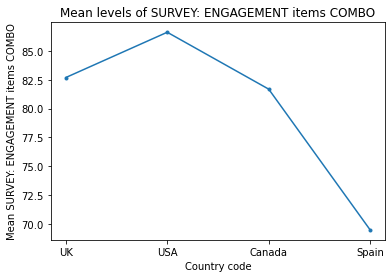

In [29]:
EC_UK_mean = EC.iloc[0, 2]
EC_USA_mean = EC.iloc[0, 3]
EC_Canada_mean = EC.iloc[1, 3]
EC_Spain_mean = EC.iloc[2, 3]
x = [UK, USA, Canada, Spain]
y = [EC_UK_mean, EC_USA_mean, EC_Canada_mean, EC_Spain_mean]

plt.figure()
plt.plot(x, y, marker='.')
plt.title('Mean levels of SURVEY: ENGAGEMENT items COMBO')
plt.xlabel('Country code')
plt.ylabel('Mean SURVEY: ENGAGEMENT items COMBO')
plt.xticks(x, values)
plt.show()

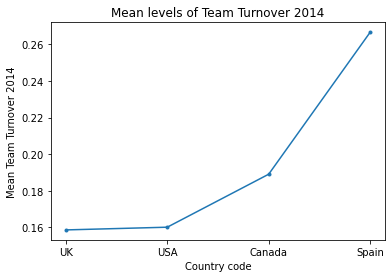

In [30]:
TC_UK_mean = TC.iloc[0, 2]
TC_USA_mean = TC.iloc[0, 3]
TC_Canada_mean = TC.iloc[1, 3]
TC_Spain_mean = TC.iloc[2, 3]
x = [UK, USA, Canada, Spain]
y = [TC_UK_mean, TC_USA_mean, TC_Canada_mean, TC_Spain_mean]

plt.figure()
plt.plot(x, y, marker='.')
plt.title('Mean levels of Team Turnover 2014')
plt.xlabel('Country code')
plt.ylabel('Mean Team Turnover 2014')
plt.xticks(x, values)
plt.show()

The above table corresponds to the "Mean levels of Team Turnover 2014 in Figure 6.20".

## Example 3: predicting individual turnover

In [31]:
#df = pd.read_excel("Chapter 6 Individual Turnover.xls")

In [32]:
pd.set_option('display.max_columns', None)
df.head()

,BossGender,Gender,Age,LengthOfService,AppraisalRating,Country,LeaverStatus
0,0,0.0,48,0,2,1,1.0
1,0,0.0,26,6,4,1,1.0
2,1,0.0,45,26,4,1,0.0
3,1,0.0,52,13,4,1,0.0
4,1,0.0,31,1,4,1,0.0


In [33]:
dfD = df
dfD["CountryD"] = dfD["Country"].replace({1:'C01_Belgium', 2:'C02_Sweden',
                  3:'C03_Italy', 4:'C04_France', 5:'C05_Poland', 6:'C06_Mexico',
                  7:'C07_Spain', 8:'C08_UK', 9:'C09_US', 10:'C10_Australia'})
D = pd.get_dummies(dfD.CountryD)
dfD = dfD.join(D)
dfD.head()

,BossGender,Gender,Age,LengthOfService,AppraisalRating,Country,LeaverStatus,CountryD,C01_Belgium,C02_Sweden,C03_Italy,C04_France,C05_Poland,C06_Mexico,C07_Spain,C08_UK,C09_US,C10_Australia
0,0,0.0,48,0,2,1,1.0,C01_Belgium,1,0,0,0,0,0,0,0,0,0
1,0,0.0,26,6,4,1,1.0,C01_Belgium,1,0,0,0,0,0,0,0,0,0
2,1,0.0,45,26,4,1,0.0,C01_Belgium,1,0,0,0,0,0,0,0,0,0
3,1,0.0,52,13,4,1,0.0,C01_Belgium,1,0,0,0,0,0,0,0,0,0
4,1,0.0,31,1,4,1,0.0,C01_Belgium,1,0,0,0,0,0,0,0,0,0


In [34]:
#from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from statsmodels.formula.api import logit

In [35]:
formula = ('LeaverStatus ~ BossGender + Gender + Age + LengthOfService + AppraisalRating + Country + C01_Belgium + C02_Sweden + C03_Italy + C04_France + C05_Poland + C06_Mexico + C07_Spain + C08_UK + C09_US')
model = logit(formula = formula, data=dfD).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.364910
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           LeaverStatus   No. Observations:                 1650
Model:                          Logit   Df Residuals:                     1635
Method:                           MLE   Df Model:                           14
Date:                Thu, 19 May 2022   Pseudo R-squ.:                 0.03971
Time:                        06:04:33   Log-Likelihood:                -602.10
converged:                       True   LL-Null:                       -627.00
Covariance Type:            nonrobust   LLR p-value:                 6.597e-06
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.2413        nan        nan        nan         nan         nan
BossGender         -0.1839      0.163     -1.126      0.260      -0.504       0.136
Gender             -0.6083      0.162     -3.762      0.000      -0.925      -0.291
Age                -0.0013      0.009     -0.143      0.886      -0.020       0.017
LengthOfService    -0.0172      0.011     -1.577      0.115      -0.039       0.004
AppraisalRating    -0.2480      0.097     -2.549      0.011      -0.439      -0.057
Country             0.0410        nan        nan        nan         nan         nan
C01_Belgium         0.1195        nan        nan        nan         nan         nan
C02_Sweden          0.3294        nan        nan        nan         nan         nan
C03_Italy           0.2279        nan        nan        nan         nan         nan
C04_France         -0.2094        nan        nan        nan         nan         nan
C05_Poland         -0.5296        nan        nan        nan         nan         nan
C06_Mexico         -0.2515        nan        nan        nan         nan         nan
C07_Spain          -0.4486        nan        nan        nan         nan         nan
C08_UK             -0.4236        nan        nan        nan         nan         nan
C09_US             -0.6574        nan        nan        nan         nan         nan
===================================================================================
"""

The above table corresponds to "Figure 6.24".

**Odds Ratio**

In [36]:
OR_BossGender = dfD['BossGender'].value_counts().iat[1] / dfD['BossGender'].value_counts().iat[0]
OR_Gender = dfD['Gender'].value_counts().iat[1] / dfD['Gender'].value_counts().iat[0]
OR_Age = dfD['Age'].value_counts().iat[1] / dfD['Age'].value_counts().iat[0]
OR_LengthOfService = dfD['LengthOfService'].value_counts().iat[1] / dfD['LengthOfService'].value_counts().iat[0]
OR_AppraisalRating = dfD['AppraisalRating'].value_counts().iat[1] / dfD['AppraisalRating'].value_counts().iat[0]
OR_Country = dfD['Country'].value_counts().iat[1] / dfD['Country'].value_counts().iat[0]

OR_C01_Belgium = dfD['C01_Belgium'].value_counts().iat[1] / dfD['C01_Belgium'].value_counts().iat[0]
OR_C02_Sweden = dfD['C02_Sweden'].value_counts().iat[1] / dfD['C02_Sweden'].value_counts().iat[0]
OR_C03_Italy = dfD['C03_Italy'].value_counts().iat[1] / dfD['C03_Italy'].value_counts().iat[0]
OR_C04_France = dfD['C04_France'].value_counts().iat[1] / dfD['C04_France'].value_counts().iat[0]
OR_C05_Poland = dfD['C05_Poland'].value_counts().iat[1] / dfD['C05_Poland'].value_counts().iat[0]
OR_C06_Mexico = dfD['C06_Mexico'].value_counts().iat[1] / dfD['C06_Mexico'].value_counts().iat[0]
OR_C07_Spain = dfD['C07_Spain'].value_counts().iat[1] / dfD['C07_Spain'].value_counts().iat[0]
OR_C08_UK = dfD['C08_UK'].value_counts().iat[1] / dfD['C08_UK'].value_counts().iat[0]
OR_C09_US = dfD['C09_US'].value_counts().iat[1] / dfD['C09_US'].value_counts().iat[0]
OR_C10_Australia = dfD['C10_Australia'].value_counts().iat[1] / dfD['C10_Australia'].value_counts().iat[0]

stats = np.hstack((OR_BossGender, OR_Gender, OR_Age, OR_LengthOfService, OR_AppraisalRating, OR_Country))
stats = stats.reshape((1, 6))
CC_string = ["OR_BossGender", "OR_Gender", "OR_Age", "OR_LengthOfService", "OR_AppraisalRating", "OR_Country"]
OR_string = ['Odds Ratio']
results1 = pd.DataFrame(stats, index=OR_string, columns=CC_string)
results1

,OR_BossGender,OR_Gender,OR_Age,OR_LengthOfService,OR_AppraisalRating,OR_Country
Odds Ratio,0.458959,0.984375,1.0,0.550661,0.158886,0.184038


In [37]:
stats = np.hstack((OR_C01_Belgium, OR_C02_Sweden, OR_C03_Italy, OR_C04_France, OR_C05_Poland))
stats = stats.reshape((1, 5))
CC_string = ["OR_C01_Belgium", "OR_C02_Sweden", "OR_C03_Italy", "OR_C04_France", "OR_C05_Poland"]
OR_string = ['Odds Ratio']
results2 = pd.DataFrame(stats, index=OR_string, columns=CC_string)
results2

,OR_C01_Belgium,OR_C02_Sweden,OR_C03_Italy,OR_C04_France,OR_C05_Poland
Odds Ratio,0.024799,0.022263,0.04422,0.022896,0.024799


In [38]:
stats = np.hstack((OR_C06_Mexico, OR_C07_Spain, OR_C08_UK, OR_C09_US, OR_C10_Australia))
stats = stats.reshape((1, 5))
CC_string = ["OR_C06_Mexico", "OR_C07_Spain", "OR_C08_UK", "OR_C09_US", "OR_C10_Australia"]
OR_string = ['Odds Ratio']
results3 = pd.DataFrame(stats, index=OR_string, columns=CC_string)
results3

,OR_C06_Mexico,OR_C07_Spain,OR_C08_UK,OR_C09_US,OR_C10_Australia
Odds Ratio,0.028625,0.048193,0.134523,0.552113,0.029265


## Example 4: comparing expected length of service for men vs women using the Kaplan-Meier survival analysis technique

In [39]:
#df = pd.read_excel("Chapter 6 Individual Turnover.xls")

In [40]:
pd.set_option('display.max_columns', None)
df.head()

,BossGender,Gender,Age,LengthOfService,AppraisalRating,Country,LeaverStatus,CountryD
0,0,0.0,48,0,2,1,1.0,C01_Belgium
1,0,0.0,26,6,4,1,1.0,C01_Belgium
2,1,0.0,45,26,4,1,0.0,C01_Belgium
3,1,0.0,52,13,4,1,0.0,C01_Belgium
4,1,0.0,31,1,4,1,0.0,C01_Belgium


In [41]:
LengthOfService = df.loc[:, ['LengthOfService', 'Gender']]

In [42]:
feamale = LengthOfService.groupby('Gender').get_group(0)
male = LengthOfService.groupby('Gender').get_group(1)

In [43]:
feamale.describe().round(3).transpose()

,count,mean,std,min,25%,50%,75%,max
LengthOfService,832.0,9.478,9.177,0.0,2.0,7.0,13.0,42.0
Gender,832.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0


In [44]:
male.describe().round(3).transpose()

,count,mean,std,min,25%,50%,75%,max
LengthOfService,819.0,10.149,10.204,0.0,2.0,7.0,15.0,41.0
Gender,819.0,1.000,0.000,1.0,1.0,1.0,1.0,1.0


The above tables correspond to "Figure 6.30: Case processing summary".

In [45]:
# https://scikit-survival.readthedocs.io/en/stable/user_guide/00-introduction.html

In [46]:
#pip install scikit-survival

In [47]:
df = df.dropna()

In [48]:
dfbool = df
dfbool["LeaverStatus"] = df["LeaverStatus"].replace({0:False, 1:True})

In [49]:
dfF = dfbool.query("Gender==0")
dfM = dfbool.query("Gender==1")

In [50]:
import sklearn
from sksurv.nonparametric import kaplan_meier_estimator

Blue: All employees
Orange: Female
Green: Male


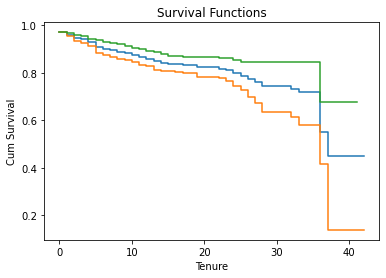

In [51]:
time, survival_prob = kaplan_meier_estimator(df["LeaverStatus"], df["LengthOfService"])
plt.step(time, survival_prob, where="post")

time, survival_prob = kaplan_meier_estimator(dfF["LeaverStatus"], dfF["LengthOfService"])
plt.step(time, survival_prob, where="post")

time, survival_prob = kaplan_meier_estimator(dfM["LeaverStatus"], dfM["LengthOfService"])
plt.step(time, survival_prob, where="post")

plt.title("Survival Functions")
plt.ylabel("Cum Survival")
plt.xlabel("Tenure")
print("Blue: All employees")
print("Orange: Female")
print("Green: Male")

The above figure corresponds to "Figure 6.34".

## Example 5: predicting team turnover

In [52]:
#df2 = pd.read_excel("Chapter 6 Turnover team DATA.xls")

In [53]:
pd.set_option('display.max_columns', None)
df2.head()

,TeamNumber,TeamSize,TeamSeparation,Country,Engagement,TeamLeader,SociallyResponsible,DriveForPerformance,PerfDevReward,WLB,UKdummy,USAdummy,CanadaDummy,SpainDummy
0,1,12,0.0,1,79,45,85,65,65,75,1,0,0,0
1,2,11,0.0,1,99,58,89,56,64,61,1,0,0,0
2,3,12,0.0,1,76,65,90,86,79,67,1,0,0,0
3,4,16,0.0,1,80,69,89,92,71,83,1,0,0,0
4,5,17,0.0,1,88,42,76,67,57,47,1,0,0,0


In [54]:
x = df2[['TeamSize', 'Engagement', 'TeamLeader', 'SociallyResponsible',
        'DriveForPerformance', 'PerfDevReward', 'WLB',
        'USAdummy', 'CanadaDummy', 'SpainDummy']]
y = df2['TeamSeparation']

X = sm.add_constant(x)
model = sm.OLS(y, X)
mlr = model.fit()
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         TeamSeparation   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     7.263
Date:                Thu, 19 May 2022   Prob (F-statistic):           8.94e-10
Time:                        06:04:34   Log-Likelihood:                 91.788
No. Observations:                 212   AIC:                            -161.6
Df Residuals:                     201   BIC:                            -124.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3486      0.159      2.191      0.030       0.035       0.662
TeamSize               -0.0008      0.005     -0.165      0.870      -0.010       0.008
Engagement             -0.0062      0.001     -5.422      0.000      -0.008      -0.004
TeamLeader             -0.0005      0.001     -0.496      0.620      -0.003       0.002
SociallyResponsible     0.0014      0.002      0.877      0.382      -0.002       0.005
DriveForPerformance     0.0020      0.001      2.588      0.010       0.000       0.003
PerfDevReward           0.0014      0.002      0.824      0.411      -0.002       0.005
WLB                    -0.0001      0.001     -0.095      0.924      -0.002       0.002
USAdummy                0.0087      0.031      0.277      0.782      -0.053       0.071
CanadaDummy             0.0534      0.042      1.273      0.204      -0.029       0.136
SpainDummy              0.0285      0.035      0.819      0.414      -0.040       0.097
==============================================================================
Omnibus:                       18.967   Durbin-Watson:                   0.568
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.277
Skew:                           0.728   Prob(JB):                     2.40e-05
Kurtosis:                       3.537   Cond. No.                     2.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The above table corresponds to "Figure 6.38".<br>
(The textbook seems to use UK dummy as the reference category in the description, but Canada dummy as the reference category in the actual analysis.)

In [55]:
df = pd.read_excel("Chapter 6 Individual Turnover.xls")

In [56]:
pd.set_option('display.max_columns', None)
df.head()

,BossGender,Gender,Age,LengthOfService,AppraisalRating,Country,LeaverStatus
0,0,0.0,48,0,2,1,1.0
1,0,0.0,26,6,4,1,1.0
2,1,0.0,45,26,4,1,0.0
3,1,0.0,52,13,4,1,0.0
4,1,0.0,31,1,4,1,0.0


In [57]:
formula = ('LeaverStatus ~ Gender')
model = logit(formula = formula, data=df).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.373687
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           LeaverStatus   No. Observations:                 1650
Model:                          Logit   Df Residuals:                     1648
Method:                           MLE   Df Model:                            1
Date:                Thu, 19 May 2022   Pseudo R-squ.:                 0.01662
Time:                        06:04:34   Log-Likelihood:                -616.58
converged:                       True   LL-Null:                       -627.00
Covariance Type:            nonrobust   LLR p-value:                 5.001e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.6327      0.094    -17.415      0.000      -1.816      -1.449
Gender        -0.6902      0.154     -4.471      0.000      -0.993      -0.388
==============================================================================
"""

The above table corresponds to "Figure 6.41".